# Нерациональная поверхность Безье
## The NURBS Book 1998, стр.45,задание 1.23
Пусть $n$ =3 и $m$=2. Рассмотрим нерациональную поверхность Безье, определяемую сеткой управления.
$$
\begin{aligned}
& \{ P_{i,0} \} = \{ (0,0,0), (3,0,3), (6,0,3), (9,0,0) \} \\
& \{ P_{i,1} \} = \{ (0,2,2), (3,2,5), (6,2,5), (9,2,2) \} \\
& \{ P_{i,2} \} = \{ (0,4,0), (3,4,3), (6,4,3), (9,4,0) \}
\end{aligned}
$$

$a)$ Нарисуйте эту поверхность.

$b)$ Используйте алгоритм де Кастельжо для вчисления точки поверхности $S(1/3, 1/2)$.

$c)$ Установите $u0=1/2$ и извлеките представление Безье(контрольные точки) кривой $C_u0 = 1/2(v)$.


### Определение поверхности Безье

Поверхность Безье задается следующей формулой:
$$ S(u, v) = \sum_{i=0}^{n} \sum_{j=0}^{m} B_{i,n}(u) B_{j,m}(v) P_{i,j} $$

где $B_{i,n}(u)$ и $B_{j,m}(v)$ - многочлены Бернштейна, а $P_{i,j}$ - контрольные точки. В данном примере, параметры $n = 3$ и $m = 2$.



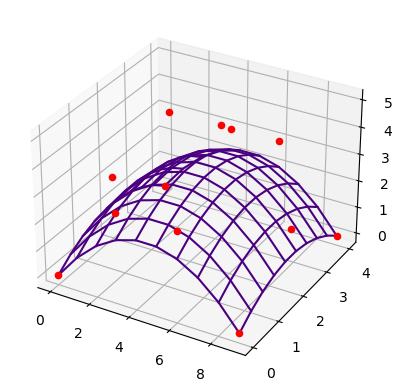

In [9]:
# a)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

def bernstein_poly(i, n, t):
    """Многочлен Бернштейна B_i^n(t)"""
    return math.comb(n, i) * (t ** i) * ((1 - t) ** (n - i))

def bezier_surface(control_points, u, v):
    n = len(control_points) - 1
    m = len(control_points[0]) - 1
    surface_point = np.zeros(3)
    
    for i in range(n + 1):
        for j in range(m + 1):
            bernstein_u = bernstein_poly(i, n, u)
            bernstein_v = bernstein_poly(j, m, v)
            surface_point += bernstein_u * bernstein_v * np.array(control_points[i][j])
    
    return surface_point

# Сетка управления
control_points = [
    [(0, 0, 0), (0, 2, 2), (0, 4, 0)],
    [(3, 0, 3), (3, 2, 5), (3, 4, 3)],
    [(6, 0, 3), (6, 2, 5), (6, 4, 3)],
    [(9, 0, 0), (9, 2, 2), (9, 4, 0)]
]

# Генерация точек поверхности
u_vals = np.linspace(0, 1, 10)
v_vals = np.linspace(0, 1, 10)
surface_points = np.array([[bezier_surface(control_points, u, v) for v in v_vals] for u in u_vals])

# Рисование поверхности вручную
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Рисуем сетку линий вдоль направлений u и v
for i in range(surface_points.shape[0]):
    ax.plot(surface_points[i, :, 0], surface_points[i, :, 1], surface_points[i, :, 2], color='indigo')

for j in range(surface_points.shape[1]):
    ax.plot(surface_points[:, j, 0], surface_points[:, j, 1], surface_points[:, j, 2], color='indigo')

# Рисование контрольных точек
for row in control_points:
    for point in row:
        ax.scatter(*point, color='red')

plt.show()


In [2]:
# b)

def deCasteljau1(points, degree, t):
    """
    Вычисляет точку на кривой Безье методом де Кастельжо для одномерного массива точек.
    """
    for r in range(1, degree + 1):
        for i in range(degree - r + 1):
            points[i] = tuple((1 - t) * points[i][k] + t * points[i + 1][k] for k in range(len(points[i])))
    return points[0]

def deCasteljau2(P, n, m, u0, v0):
    """
    Вычисляет точку на цилиндрической лоскутной поверхности методом де Кастельжо.
    """
    Q = [[0] * (m + 1) for _ in range(n + 1)]
    
    for j in range(n + 1):
        Q[j] = deCasteljau1([P[j][i] for i in range(m + 1)], m, v0)
    S = deCasteljau1(Q, n, u0)
    
    return S

# Использование алгоритма де Кастельжо для вычисления точки поверхности S(1/3, 1/2)
u0 = 1/3
v0 = 1/2
point = deCasteljau2(control_points, 3, 2, u0, v0)
print(f"Точка на поверхности S(1/3, 1/2): {point}")


Точка на поверхности S(1/3, 1/2): (3.0, 2.0, 3.0000000000000004)


In [4]:
# c)

def bezier_curve(control_points, u):
    n = len(control_points) - 1
    curve_points = []
    
    for j in range(len(control_points[0])):
        curve_points.append(deCasteljau1([control_points[i][j] for i in range(n + 1)], n, u))
    
    return curve_points

# Представление кривой C_{u_0=1/2}(v)
u0 = 1/2
curve_control_points = bezier_curve(control_points, u0)
print(f"Контрольные точки кривой C_{{u_0={u0}}}(v): {curve_control_points}")



Контрольные точки кривой C_{u_0=0.5}(v): [(4.5, 0.0, 2.25), (4.5, 2.0, 4.25), (4.5, 4.0, 2.25)]
